In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# runge-kutta 4
def rg4(f, t0, t1, X0, h):
    N = int((t1 - t0) / h)
    OUT = np.zeros((N, X0.size))
    OUT[0] = X0
    T = np.linspace(t0, t1, N)
    for i in range(0, N - 1):
        k1 = f(T[i], OUT[i])
        k2 = f(T[i] + h / 3, OUT[i] + k1 * h / 3)
        k3 = f(T[i] + 2 * h / 3, OUT[i] - k1 * h / 3 + k2 * h)
        k4 = f(T[i] + h, OUT[i] + k1 * h - k2 * h + k3 * h)
        OUT[i + 1] = OUT[i] + h * (k1 / 8 + 3 * k2 / 8 + 3 * k3 / 8 + k4 / 8)
    return OUT

$\dfrac{d^2Θ}{dt^2}+a\dfrac{dΘ}{dt}+bsin(Θ)=0$  
$\dfrac{dΘ}{dt}=p$  
$\dfrac{dp}{dt}=-ap-bsin(Θ)$

In [19]:
a = 0.05
b = 1
t0 = 0
t1 = 100
N = 10000
h = (t1 - t0) / N

In [24]:
t = np.linspace(t0, t1 - h, N)

In [7]:
def F(t, X):
    return np.array([X[1], -a * X[1] - b * np.sin(X[0])])

In [30]:
x0_n = np.array([[1, 0], [0, 1], [1, 1]]) # some different initial values
X = np.array([rg4(F, t0, t1, x0, h) for x0 in x0_n]) # solving system for each

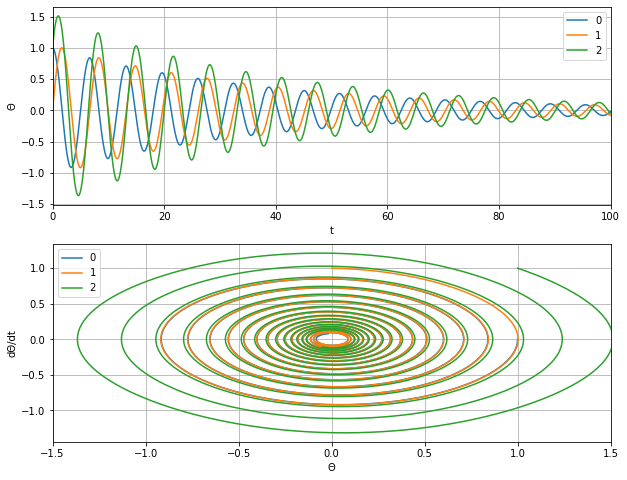

In [32]:
fig, axs = plt.subplots(2, 1, figsize = (10, 8))
idx = 0
# drawing solutions and phase diagrams
for x in X:
    axs[0].plot(t, x[:, 0], '-', label = idx)
    axs[1].plot(x[:, 0], x[:, 1], '-', label = idx)
    idx += 1
axs[0].set_ylabel('Θ')
axs[1].set_ylabel('dΘ/dt')
axs[0].set_xlim(t0, t1)
axs[1].set_xlim(-1.5, 1.5)
axs[0].set_xlabel('t')
axs[1].set_xlabel('Θ')
for ax in axs:
    ax.legend()
    ax.grid(True)